In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 

In [2]:
#local path where the data locates, change it to your local path
record = pd.read_csv("Desktop/Carnivore_Research/CS_21Jan27.csv")

In [3]:
col=['Time_Seen','Species','Latitude','Longitude','Media']

In [4]:
record.columns = col
record['Time_Seen'] = pd.to_datetime(record.Time_Seen,utc=True).copy()
record['Month'] = record.Time_Seen.dt.month
record['Hour'] = record.Time_Seen.dt.hour
record['Year'] = record.Time_Seen.dt.year

In [5]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [6]:
rec19 = record[record.Year == 2019]
rec19.head()

,Time_Seen,Species,Latitude,Longitude,Media,Month,Hour,Year
0,2019-09-18 14:00:00.532000+00:00,Coyote,47.815188,-122.088653,[],9,14,2019
1,2019-08-06 13:15:00+00:00,Coyote,47.683153,-122.127485,[],8,13,2019
2,2019-09-09 13:30:00+00:00,Cougar/Mountain Lion,47.603330,-122.210544,[],9,13,2019
3,2019-08-01 16:45:00+00:00,Coyote,47.676127,-122.328966,[],8,16,2019
4,2019-12-18 22:00:00+00:00,Coyote,47.647155,-122.078566,[],12,22,2019


In [7]:
rec19_coyo = rec19[rec19.Species == 'Coyote']

In [8]:
rec19_coyo = rec19_coyo.drop(['Time_Seen','Species','Month','Hour','Year','Media'],axis=1)

In [9]:
rec19_king = rec19_coyo[(rec19_coyo['Latitude']>minLat)&(rec19_coyo['Latitude']<maxLat)&(rec19_coyo['Longitude']>minLon)&(rec19_coyo['Longitude']<maxLon)]

In [13]:
optics_model = OPTICS(min_samples=15, max_eps=0.3)

In [14]:
optics_model.fit(rec19_king)

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=0.3, metric='minkowski', metric_params=None,
       min_cluster_size=None, min_samples=15, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

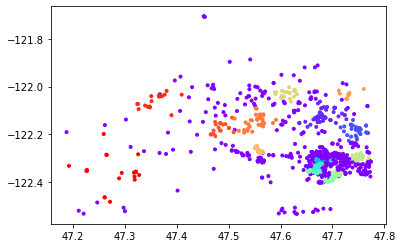

In [15]:
plt.scatter(rec19_king.iloc[:,0], rec19_king.iloc[:,1], c=optics_model.labels_, cmap='rainbow',marker='.')

In [16]:
realClusterNum = len(set(optics_model.labels_))-(1 if -1 in (optics_model.labels_) else 0)
realClusterNum

19